Tim Hollinger Homework

# Chapter 5 exercise 3

### a) Explain how K-fold cross validation is implemented:
    This approach involves randomly k-fold CV
    dividing the set of observations into k groups, or folds, of approximately
    equal size. The first fold is treated as a validation set, and the method
    is fit on the remaining k − 1 folds

### b) What are the advantages and disadvantages of k-fold crossvalidation relative to:
i. The validation set approach?

Advantages for the validation set approach are that you are able to find the MSE for different model fits to determine which fits best. Running the model multiple times will likely show similar but slightly different results. It's also easy and simple to implement.

Disadvantages for the validation set are that since the data is randomly divded and the results do vary, it may not be possible to find a consensus among the models as to which curve fits best. The validation set error rate may tend to overestimate the test error rate.

ii. LOOCV?

Advantages for LOOCV are that it is much more unbiased that the validation set approach as a result of only using one observation for the validation set. LOOCV also does not usually overestimate test error rates. Performing LOOCV will also always result in the same results no matter how many times the model is run.


Disadvantages for LOOCV are that because only one observation is used, the accuracy is much lower. Because LOOCV must be fit multiple times, the method can be expensive to implement.



## 8. We will now perform cross-validation on a simulated data set.
(a) Generate a simulated data set as follows:

In [2]:
set.seed(1)
x=rnorm(100)
y=x-2*x^2+rnorm (100)

#n = 100, p = 2.
#Y=X−2X2+ϵ.

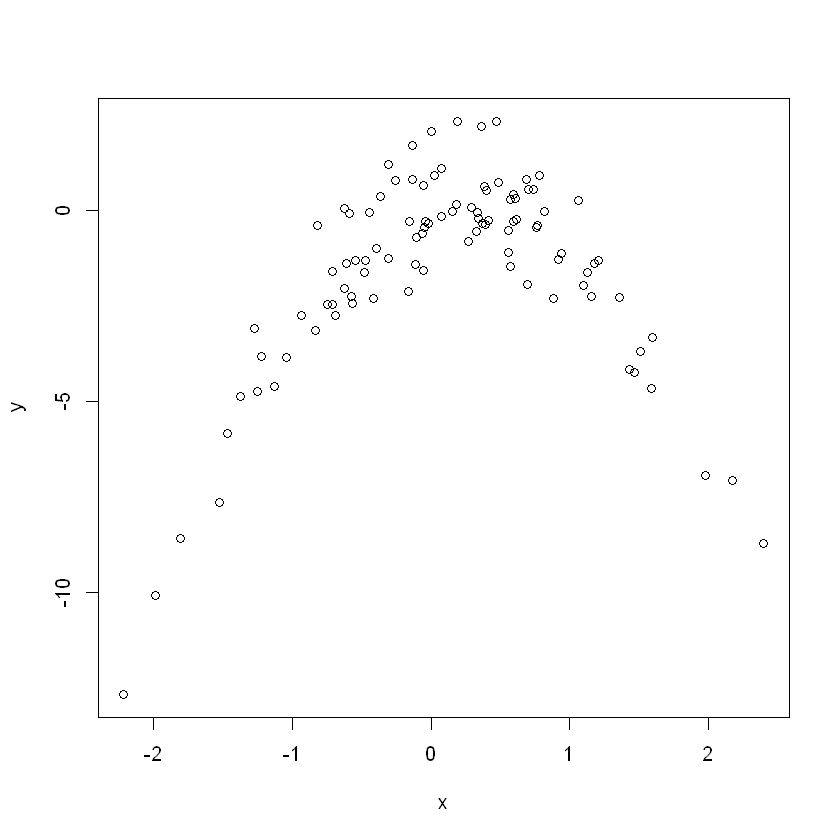

In [4]:
#b create a scatterplot
plot(x, y)

# we get a quadratic plot

In [11]:
#c Set a random seed, and then compute the LOOCV errors that
#result from fitting the following four models using least squares:
install.packages("boot")
library(boot)
Data = data.frame(x, y)
set.seed(1)
# i.
glm.fit = glm(y ~ x)
cv.glm(Data, glm.fit)$delta
#ii
glm.fit = glm(y ~ poly(x, 2))
cv.glm(Data, glm.fit)$delta

Warning message:
"package 'boot' is in use and will not be installed"

[1] 7.288162 7.284744

[1] 0.9374236 0.9371789

In [12]:
#iii
glm.fit = glm(y ~ poly(x, 3))
cv.glm(Data, glm.fit)$delta

[1] 0.9566218 0.9562538

In [13]:
#.iv
glm.fit = glm(y ~ poly(x, 4))
cv.glm(Data, glm.fit)$delta

[1] 0.9539049 0.9534453

In [14]:
#d  Repeat (c) using another random seed, and report your results.
#Are your results the same as what you got in (c)? Why?

set.seed(10)
# i.
glm.fit = glm(y ~ x)
cv.glm(Data, glm.fit)$delta

[1] 7.288162 7.284744

In [15]:
#ii
glm.fit = glm(y ~ poly(x, 2))
cv.glm(Data, glm.fit)$delta

[1] 0.9374236 0.9371789

In [16]:
# iii
glm.fit = glm(y ~ poly(x, 3))
cv.glm(Data, glm.fit)$delta

[1] 0.9566218 0.9562538

In [17]:
# iv
glm.fit = glm(y ~ poly(x, 4))
cv.glm(Data, glm.fit)$delta

[1] 0.9539049 0.9534453

#e Which of the models in (c) had the smallest LOOCV error? Is
#this what you expected? Explain your answer

The quadratic polynomial had the lowest test error rate.

In [18]:
#f ) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using
#least squares. Do these results agree with the conclusions drawn
#based on the cross-validation results?

summary(glm.fit)


Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0550  -0.6212  -0.1567   0.5952   2.2267  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.55002    0.09591 -16.162  < 2e-16 ***
poly(x, 4)1   6.18883    0.95905   6.453 4.59e-09 ***
poly(x, 4)2 -23.94830    0.95905 -24.971  < 2e-16 ***
poly(x, 4)3   0.26411    0.95905   0.275    0.784    
poly(x, 4)4   1.25710    0.95905   1.311    0.193    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9197797)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  87.379  on 95  degrees of freedom
AIC: 282.3

Number of Fisher Scoring iterations: 2


### Chapter 6 question 1
We perform best subset, forward stepwise, and backward stepwise
selection on a single data set. For each approach, we obtain p + 1
models, containing 0, 1, 2,...,p predictors. Explain your answers:

### a 
Which of the three models with k predictors has the smallest
training RSS?

The best subset has the smallest RSS

### b 
best subset test more models so as a result it gets the smallest RSS

### c
T
T
F
F
F

### Chapter 6 question 9

 ### In this exercise, we will predict the number of applications received
### using the other variables in the College data set.

In [2]:
#a) Split the data set into a training set and a test set.
library(ISLR)
set.seed(11)
sum(is.na(College))
train.size = dim(College)[1] / 2
train = sample(1:dim(College)[1], train.size)
test = -train
College.train = College[train, ]
College.test = College[test, ]

[1] 0

In [3]:
#b) Fit a linear model using least squares on the training set, and
#report the test error obtained.
lm.fit = lm(Apps~., data=College.train)
lm.pred = predict(lm.fit, College.test)
mean((College.test[, "Apps"] - lm.pred)^2)

[1] 1026096

In [7]:
#c) Fit a ridge regression model on the training set, with λ chosen
# by cross-validation. Report the test error obtained.
install.packages("glmnet")
library(glmnet)


Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsalso installing the dependency 'shape'



package 'shape' successfully unpacked and MD5 sums checked
package 'glmnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tholl\AppData\Local\Temp\RtmpcT4m2v\downloaded_packages


Warning message:
"package 'glmnet' was built under R version 3.6.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.3"Loaded glmnet 4.1-1


In [10]:
train.mat = model.matrix(Apps~., data=College.train)
test.mat = model.matrix(Apps~., data=College.test)
grid = 10 ^ seq(4, -2, length=100)
mod.ridge = cv.glmnet(train.mat, College.train[, "Apps"], alpha=0, lambda=grid, thresh=1e-12)
lambda.best = mod.ridge$lambda.min
lambda.best


[1] 0.01

In [11]:
ridge.pred = predict(mod.ridge, newx=test.mat, s=lambda.best)
mean((College.test[, "Apps"] - ridge.pred)^2)
# rss = 1026068.65

[1] 1026069

In [9]:
#d) Fit a lasso model on the training set, with λ chosen by crossvalidation. Report the test error obtained, along with the number of non-zero coefficient estimates.
mod.lasso = cv.glmnet(train.mat, College.train[, "Apps"], alpha=1, lambda=grid, thresh=1e-12)
lambda.best = mod.lasso$lambda.min
lambda.best

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] 0.01

In [12]:
lasso.pred = predict(mod.lasso, newx=test.mat, s=lambda.best)
mean((College.test[, "Apps"] - lasso.pred)^2)
#rss = 1026035.857

[1] 1026036

In [14]:
#e) 
install.packages('pls')
library(pls)

package 'pls' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tholl\AppData\Local\Temp\RtmpcT4m2v\downloaded_packages


Warning message:
"package 'pls' was built under R version 3.6.3"
Attaching package: 'pls'

The following object is masked from 'package:stats':

    loadings



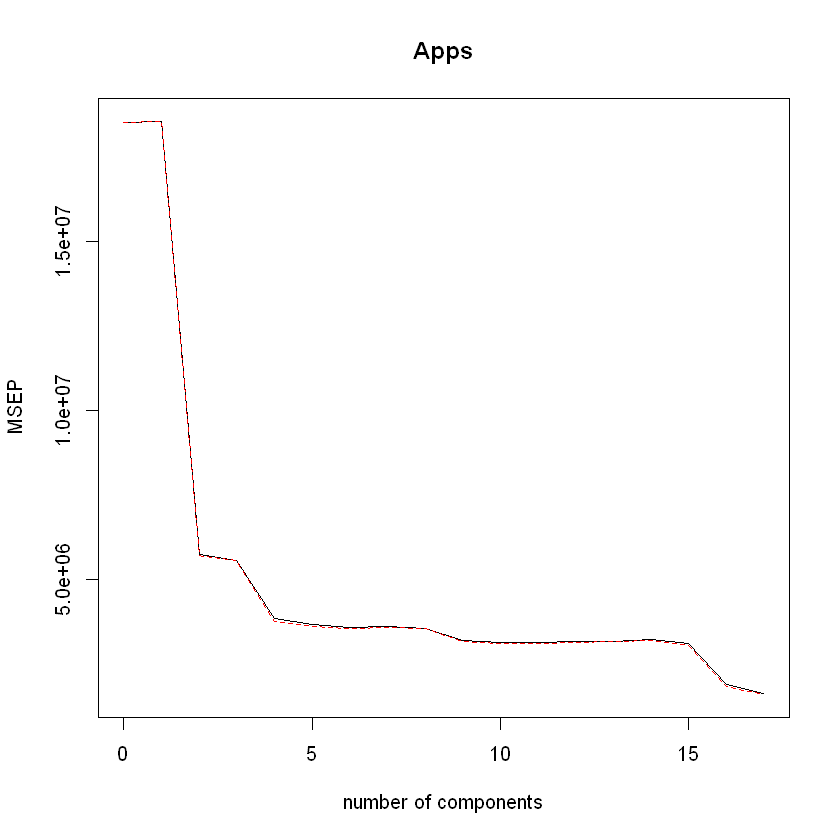

In [15]:
pcr.fit = pcr(Apps~., data=College.train, scale=T, validation="CV")
validationplot(pcr.fit, val.type="MSEP")

In [16]:
pcr.pred = predict(pcr.fit, College.test, ncomp=10)
mean((College.test[, "Apps"] - data.frame(pcr.pred))^2)

Warning message in mean.default((College.test[, "Apps"] - data.frame(pcr.pred))^2):
"argument is not numeric or logical: returning NA"

[1] NA

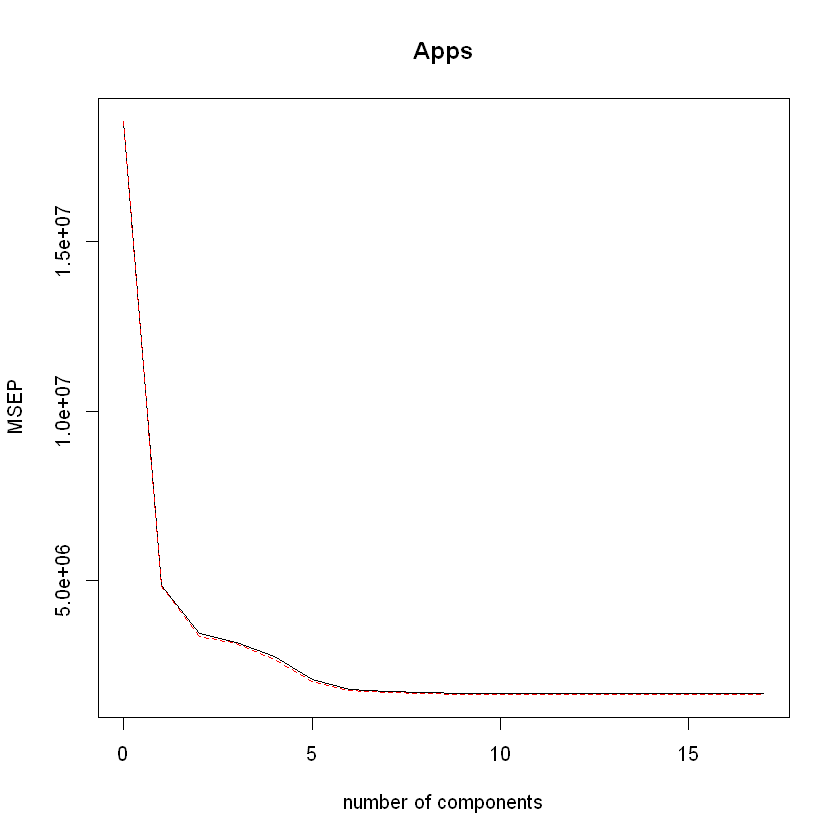

In [17]:
#f) ) Fit a PLS model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value
# of M selected by cross-validation.
pls.fit = plsr(Apps~., data=College.train, scale=T, validation="CV")
validationplot(pls.fit, val.type="MSEP")

In [18]:
pls.pred = predict(pls.fit, College.test, ncomp=10)
mean((College.test[, "Apps"] - data.frame(pls.pred))^2)

Warning message in mean.default((College.test[, "Apps"] - data.frame(pls.pred))^2):
"argument is not numeric or logical: returning NA"

[1] NA

Warning message in mean.default((College.test[, "Apps"] - data.frame(pcr.pred))^2):
"argument is not numeric or logical: returning NA"Warning message in mean.default((College.test[, "Apps"] - data.frame(pls.pred))^2):
"argument is not numeric or logical: returning NA"

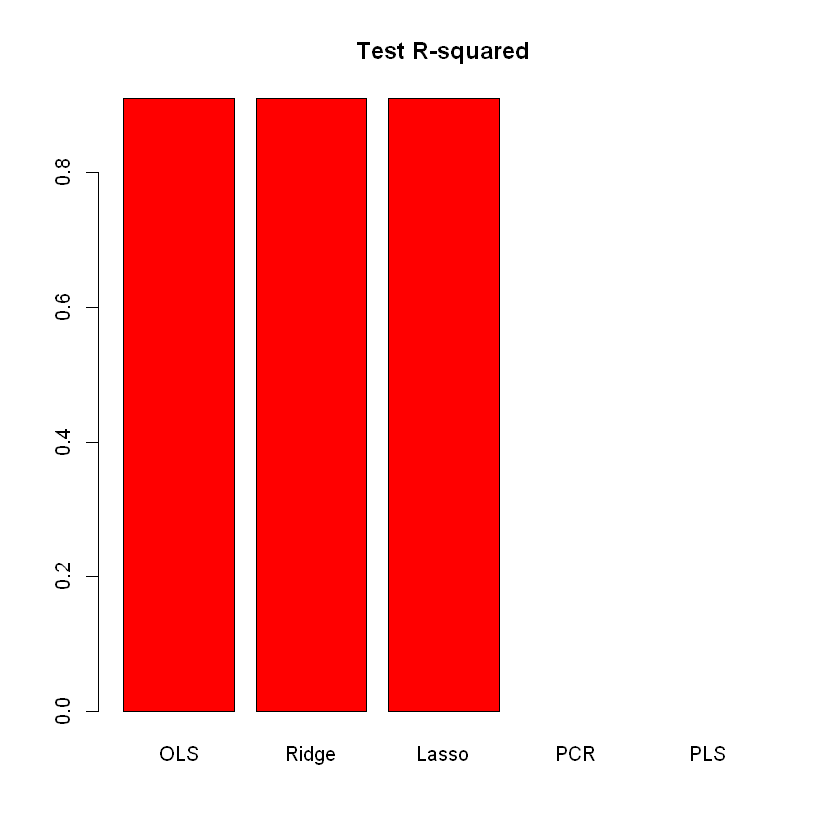

In [20]:
#g  Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much
#difference among the test errors resulting from these five approaches?

#ols, ridge and lasso are very comparable below are the test errors from the 5 approaches
test.avg = mean(College.test[, "Apps"])
lm.test.r2 = 1 - mean((College.test[, "Apps"] - lm.pred)^2) /mean((College.test[, "Apps"] - test.avg)^2)
ridge.test.r2 = 1 - mean((College.test[, "Apps"] - ridge.pred)^2) /mean((College.test[, "Apps"] - test.avg)^2)
lasso.test.r2 = 1 - mean((College.test[, "Apps"] - lasso.pred)^2) /mean((College.test[, "Apps"] - test.avg)^2)
pcr.test.r2 = 1 - mean((College.test[, "Apps"] - data.frame(pcr.pred))^2) /mean((College.test[, "Apps"] - test.avg)^2)
pls.test.r2 = 1 - mean((College.test[, "Apps"] - data.frame(pls.pred))^2) /mean((College.test[, "Apps"] - test.avg)^2)
barplot(c(lm.test.r2, ridge.test.r2, lasso.test.r2, pcr.test.r2, pls.test.r2), col="red", names.arg=c("OLS", "Ridge", "Lasso", "PCR", "PLS"), main="Test R-squared")

### Chapter 7 Question 9
. This question uses the variables dis (the weighted mean of distances
to five Boston employment centers) and nox (nitrogen oxides concentration in parts per 10 million) from the Boston data. We will treat
dis as the predictor and nox as the response.

In [21]:
#a) Use the poly() function to fit a cubic polynomial regression to
#predict nox using dis. Report the regression output, and plot
#the resulting data and polynomial fits.

set.seed(1)
library(MASS)
attach(Boston)
lm.fit = lm(nox ~ poly(dis, 3), data = Boston)
summary(lm.fit)

Warning message:
"package 'MASS' was built under R version 3.6.3"


Call:
lm(formula = nox ~ poly(dis, 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


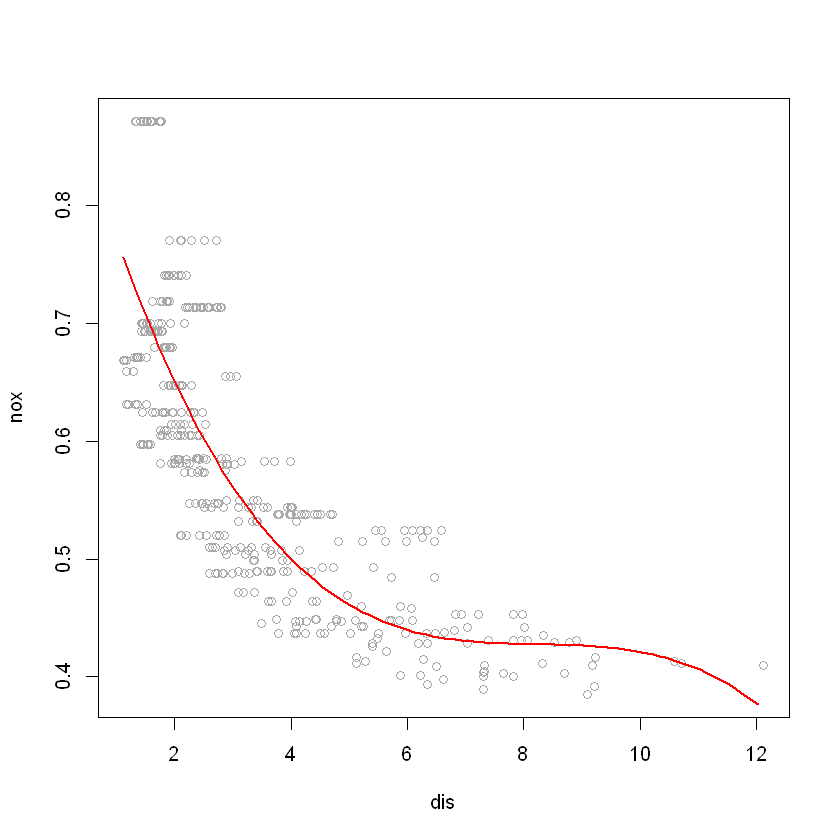

In [22]:
dislim = range(dis)
dis.grid = seq(from = dislim[1], to = dislim[2], by = 0.1)
lm.pred = predict(lm.fit, list(dis = dis.grid))
plot(nox ~ dis, data = Boston, col = "darkgrey")
lines(dis.grid, lm.pred, col = "red", lwd = 2)

In [23]:
#b) Plot the polynomial fits for a range of different polynomial
#degrees (say, from 1 to 10), and report the associated residual
#sum of squares.
all.rss = rep(NA, 10)
for (i in 1:10) {
    lm.fit = lm(nox ~ poly(dis, i), data = Boston)
    all.rss[i] = sum(lm.fit$residuals^2)
}
all.rss

[1] 2.768563 2.035262 1.934107 1.932981 1.915290 1.878257 1.849484 1.835630
 [9] 1.833331 1.832171

In [ ]:
#rss decreases after each degree

Warning message:
"package 'boot' was built under R version 3.6.3"

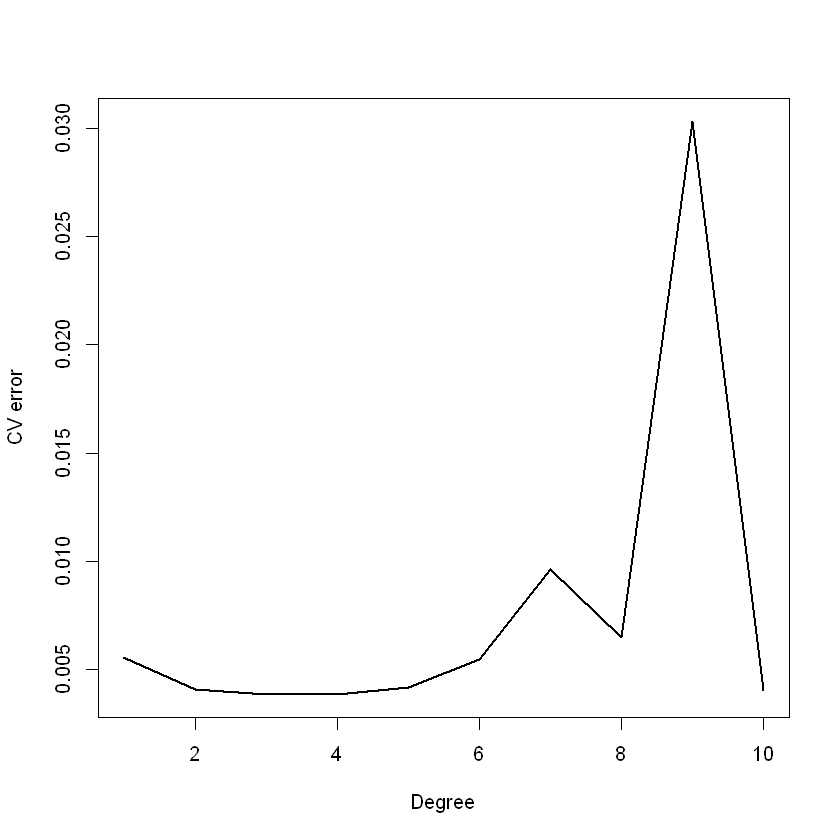

In [24]:
#c) Perform cross-validation or another approach to select the optimal degree for the polynomial, and explain your results.

library(boot)
all.deltas = rep(NA, 10)
for (i in 1:10) {
    glm.fit = glm(nox ~ poly(dis, i), data = Boston)
    all.deltas[i] = cv.glm(Boston, glm.fit, K = 10)$delta[2]
}
plot(1:10, all.deltas, xlab = "Degree", ylab = "CV error", type = "l", pch = 20, 
    lwd = 2)

In [25]:
#degree 6 and 8 cause the error to increase drastically


Call:
lm(formula = nox ~ bs(dis, df = 4, knots = c(4, 7, 11)), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.124567 -0.040355 -0.008702  0.024740  0.192920 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            0.73926    0.01331  55.537  < 2e-16 ***
bs(dis, df = 4, knots = c(4, 7, 11))1 -0.08861    0.02504  -3.539  0.00044 ***
bs(dis, df = 4, knots = c(4, 7, 11))2 -0.31341    0.01680 -18.658  < 2e-16 ***
bs(dis, df = 4, knots = c(4, 7, 11))3 -0.26618    0.03147  -8.459 3.00e-16 ***
bs(dis, df = 4, knots = c(4, 7, 11))4 -0.39802    0.04647  -8.565  < 2e-16 ***
bs(dis, df = 4, knots = c(4, 7, 11))5 -0.25681    0.09001  -2.853  0.00451 ** 
bs(dis, df = 4, knots = c(4, 7, 11))6 -0.32926    0.06327  -5.204 2.85e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06185 on 499 degrees of freedom
Multiple R-squared:  0.7185,	Adju

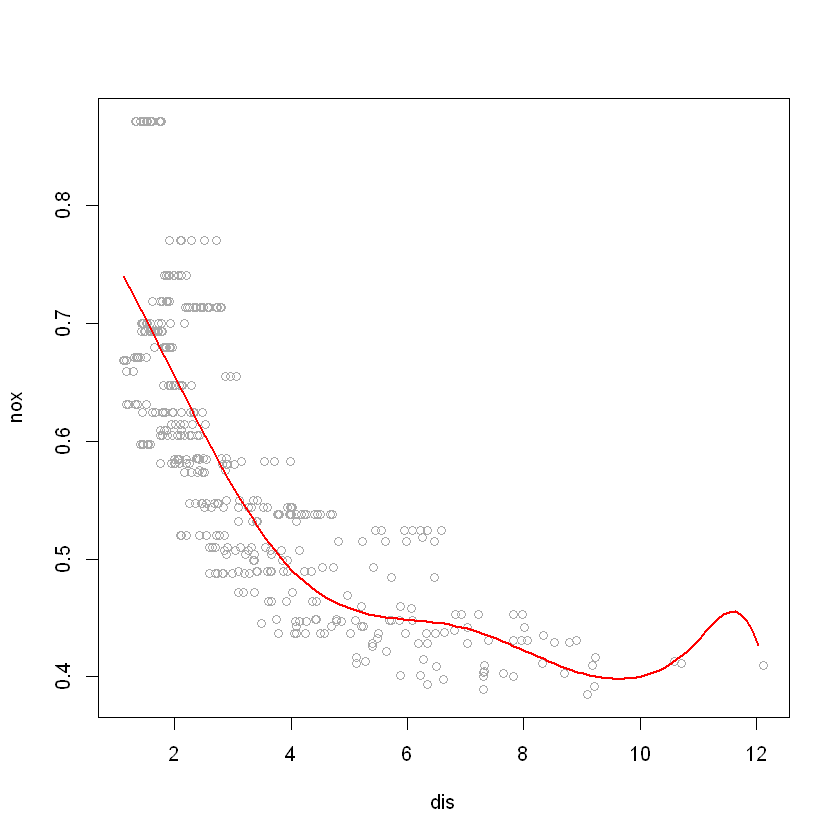

In [27]:
#d)Use the bs() function to fit a regression spline to predict nox
#using dis. Report the output for the fit using four degrees of
#freedom. How did you choose the knots? Plot the resulting fit.

library(splines)
sp.fit = lm(nox ~ bs(dis, df = 4, knots = c(4, 7, 11)), data = Boston)
summary(sp.fit)
sp.pred = predict(sp.fit, list(dis = dis.grid))
plot(nox ~ dis, data = Boston, col = "darkgrey")
lines(dis.grid, sp.pred, col = "red", lwd = 2)

In [28]:
#e) Now fit a regression spline for a range of degrees of freedom, and
#plot the resulting fits and report the resulting RSS. Describe the
#results obtained.

all.cv = rep(NA, 16)
for (i in 3:16) {
    lm.fit = lm(nox ~ bs(dis, df = i), data = Boston)
    all.cv[i] = sum(lm.fit$residuals^2)
}
all.cv[-c(1, 2)]

[1] 1.934107 1.922775 1.840173 1.833966 1.829884 1.816995 1.825653 1.792535
 [9] 1.796992 1.788999 1.782350 1.781838 1.782798 1.783546

In [29]:
#f Perform cross-validation or another approach in order to select
#the best degrees of freedom for a regression spline on this data.
#Describe your results
all.cv = rep(NA, 16)
for (i in 3:16) {
    lm.fit = glm(nox ~ bs(dis, df = i), data = Boston)
    all.cv[i] = cv.glm(Boston, lm.fit, K = 10)$delta[2]
}

Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.0992), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.0992), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, deg

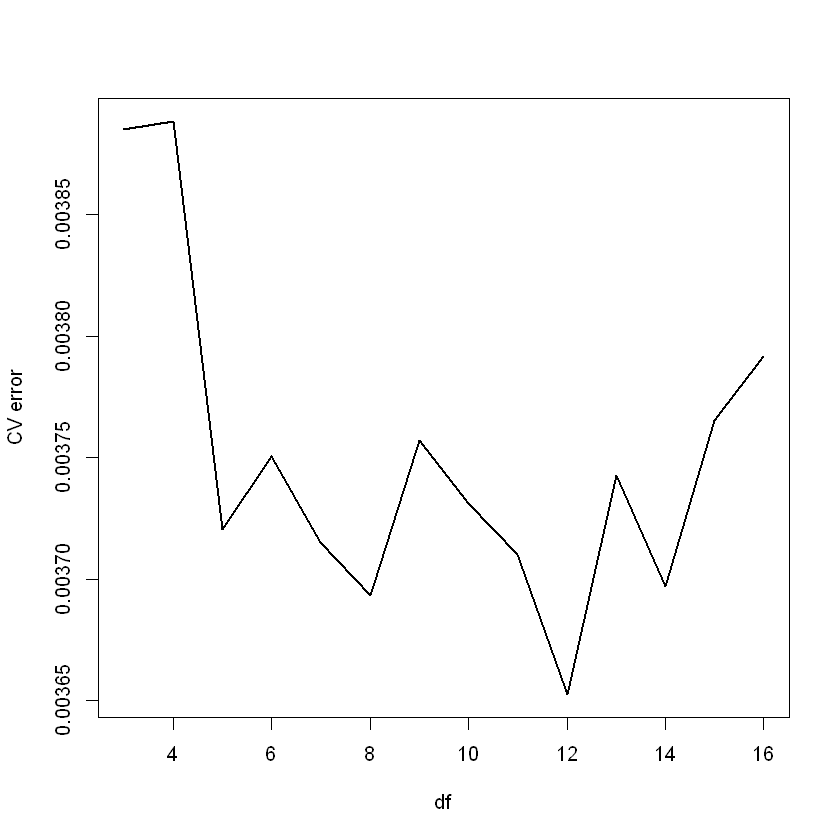

In [30]:
plot(3:16, all.cv[-c(1, 2)], lwd = 2, type = "l", xlab = "df", ylab = "CV error")

### Chapter 7 Question 10

package 'leaps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tholl\AppData\Local\Temp\RtmpcT4m2v\downloaded_packages


Warning message:
"package 'leaps' was built under R version 3.6.3"

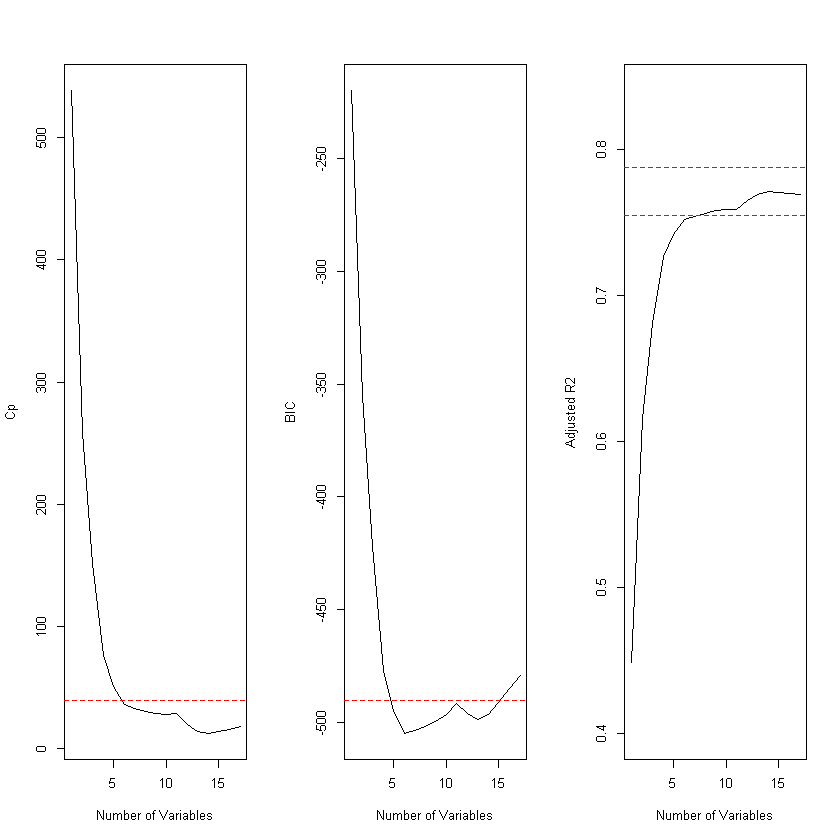

In [32]:
#a) Split the data into a training set and a test set. Using out-of-state
#tuition as the response and the other variables as the predictors,
#perform forward stepwise selection on the training set in order
#to identify a satisfactory model that uses just a subset of the
#predictors

set.seed(1)
library(ISLR)
install.packages('leaps')
library(leaps)
attach(College)
train = sample(length(Outstate), length(Outstate)/2)
test = -train
College.train = College[train, ]
College.test = College[test, ]
reg.fit = regsubsets(Outstate ~ ., data = College.train, nvmax = 17, method = "forward")
reg.summary = summary(reg.fit)
par(mfrow = c(1, 3))
plot(reg.summary$cp, xlab = "Number of Variables", ylab = "Cp", type = "l")
min.cp = min(reg.summary$cp)
std.cp = sd(reg.summary$cp)
abline(h = min.cp + 0.2 * std.cp, col = "red", lty = 2)
abline(h = min.cp - 0.2 * std.cp, col = "red", lty = 2)
plot(reg.summary$bic, xlab = "Number of Variables", ylab = "BIC", type = "l")
min.bic = min(reg.summary$bic)
std.bic = sd(reg.summary$bic)
abline(h = min.bic + 0.2 * std.bic, col = "red", lty = 2)
abline(h = min.bic - 0.2 * std.bic, col = "red", lty = 2)
plot(reg.summary$adjr2, xlab = "Number of Variables", ylab = "Adjusted R2", 
    type = "l", ylim = c(0.4, 0.84))
max.adjr2 = max(reg.summary$adjr2)
std.adjr2 = sd(reg.summary$adjr2)
abline(h = max.adjr2 + 0.2 * std.adjr2, col = "red", lty = 2)
abline(h = max.adjr2 - 0.2 * std.adjr2, col = "red", lty = 2)

In [33]:
reg.fit = regsubsets(Outstate ~ ., data = College, method = "forward")
coefi = coef(reg.fit, id = 6)
names(coefi)

[1] "(Intercept)" "PrivateYes"  "Room.Board"  "PhD"         "perc.alumni"
[6] "Expend"      "Grad.Rate"

In [35]:
#b) Fit a GAM on the training data, using out-of-state tuition as
#the response and the features selected in the previous step as
#the predictors. Plot the results, and explain your findings.
install.packages('gam')
library(gam)


  There is a binary version available but the source version is later:
    binary source needs_compilation
gam 1.16.1   1.20              TRUE

  Binaries will be installed
package 'gam' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tholl\AppData\Local\Temp\RtmpcT4m2v\downloaded_packages


Warning message:
"package 'gam' was built under R version 3.6.3"Loading required package: foreach
Warning message:
"package 'foreach' was built under R version 3.6.3"Loaded gam 1.16.1



Warning message in model.matrix.default(mt, mf, contrasts):
"non-list contrasts argument ignored"

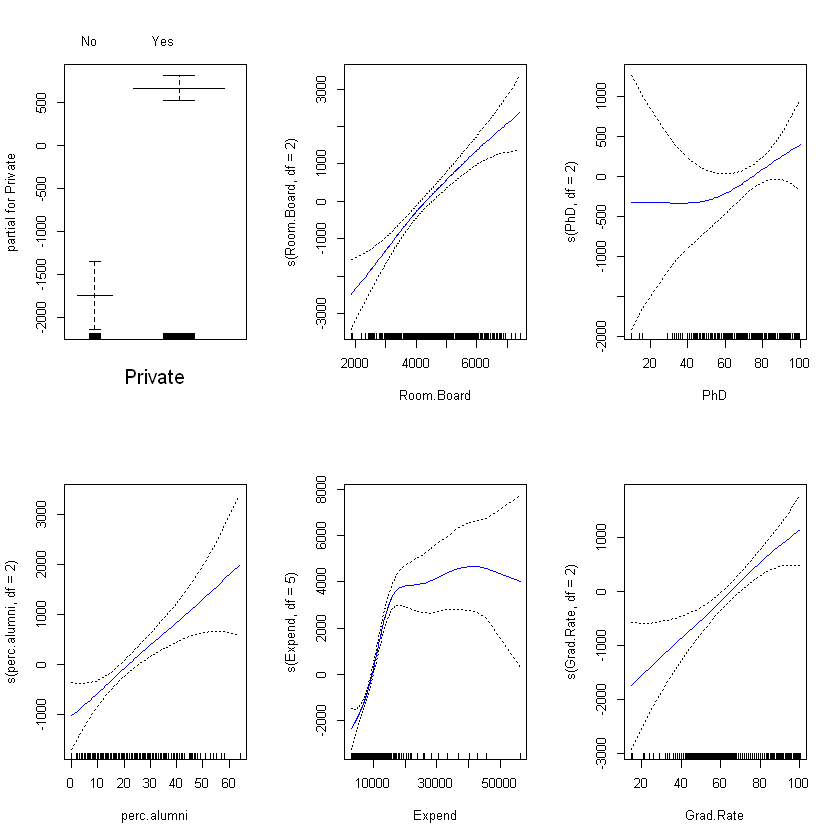

In [36]:
gam.fit = gam(Outstate ~ Private + s(Room.Board, df = 2) + s(PhD, df = 2) + 
    s(perc.alumni, df = 2) + s(Expend, df = 5) + s(Grad.Rate, df = 2), data = College.train)
par(mfrow = c(2, 3))
plot(gam.fit, se = T, col = "blue")

In [38]:
#c) ) Evaluate the model obtained on the test set, and explain the
#results obtained.
gam.pred = predict(gam.fit, College.test)
gam.err = mean((College.test$Outstate - gam.pred)^2)
gam.err
gam.tss = mean((College.test$Outstate - mean(College.test$Outstate))^2)
test.rss = 1 - gam.err/gam.tss
test.rss

[1] 3349290

[1] 0.7660016

In [39]:
#d) For which variables, if any, is there evidence of a non-linear
#relationship with the response?
summary(gam.fit)


Call: gam(formula = Outstate ~ Private + s(Room.Board, df = 2) + s(PhD, 
    df = 2) + s(perc.alumni, df = 2) + s(Expend, df = 5) + s(Grad.Rate, 
    df = 2), data = College.train)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-7402.89 -1114.45   -12.67  1282.69  7470.60 

(Dispersion Parameter for gaussian family taken to be 3711182)

    Null Deviance: 6989966760 on 387 degrees of freedom
Residual Deviance: 1384271126 on 373 degrees of freedom
AIC: 6987.021 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
                        Df     Sum Sq    Mean Sq F value    Pr(>F)    
Private                  1 1778718277 1778718277 479.286 < 2.2e-16 ***
s(Room.Board, df = 2)    1 1577115244 1577115244 424.963 < 2.2e-16 ***
s(PhD, df = 2)           1  322431195  322431195  86.881 < 2.2e-16 ***
s(perc.alumni, df = 2)   1  336869281  336869281  90.771 < 2.2e-16 ***
s(Expend, df = 5)        1  530538753  530538753 142.957 < 2.2e-16 ***
s(Grad.Rate, df = 